# ASSIGNMENT: HOUSE PRICE PRIDICTION
### The Assignment can be divided into the following major steps:
1. Dataset reading and Cleaning.
2. Data Visualisation and EDA.
3. Model Formation
4. Lasso and Ridge

## <font color='brown'>Dataset Cleaning and Preparation.</font>

Importing Libraries

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

# Importing the libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [15]:
# reading the csv file
house = pd.read_csv('D:/upgrad excel/house.csv', na_values='NAN')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
print('columns = ', len(house.columns), ' Rows = ', len(house.index))

columns =  81  Rows =  1460


In [17]:
# checking out the info of the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<font color='blue' size=4>We can see a lot of null values present, but the values are not actually null. They have some meaning as per the Data description.</font> 

<font color='green' size=4>Treating the NAN values</font>

From the Data description file provided, we have the knowledge for the NAN values present in various columns. Imputing with other value might prevent it from getting ignored, so that it can actually contribute to the house pricing prediction.

In [18]:
#the columns which has NAN which actually has a meaning
null_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [19]:
for i in null_cols:
    house[i].fillna("None", inplace=True)
    house[i].fillna("None", inplace=True)

In [20]:
# checking the info of the present dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

<font color='blue' size=4>We can see the number of null values has decreased in huge quantity.</font>

<font color='green' size=4>Treating the null values of the numerical columns</font>

In [21]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
#missing data analysis
total = house.isnull().sum()
percent = (house.isnull().sum()/house.isnull().count())*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.sort_values(by='Percent', ascending=False)
missing_data.head()

,Total,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493


'LotFrontage' has a lot of null values. This column is not that important, hence can be dropped.

In [23]:
house = house.drop('LotFrontage', axis=1)

'GarageYrBlt' column is year column with only 5 percent missing values, and 'MasVnrArea', both can be imputed with their medians

In [24]:
# imputing median of the column 'GarageYrBlt' to its missing values
house['GarageYrBlt'].fillna(house['GarageYrBlt'].median(), inplace=True)
house['MasVnrArea'].fillna(house['MasVnrArea'].median(), inplace=True)

In [25]:
#missing data analysis
total = house.isnull().sum()
percent = (house.isnull().sum()/house.isnull().count())*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.sort_values(by='Percent', ascending=False)
missing_data.head()

,Total,Percent
MasVnrType,8,0.547945
Electrical,1,0.068493
Id,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000


In [26]:
# dropping the rows with 'MasVnrType' has a null value
house = house.dropna()

In [27]:
#missing data analysis
total = house.isnull().sum()
percent = (house.isnull().sum()/house.isnull().count())*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.sort_values(by='Percent', ascending=False)
missing_data.head()

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


<font color='blue' size=4>All the missing values has been treated.</font>

In [28]:
print('The Shape of the dataset now is,',house.shape)

The Shape of the dataset now is, (1451, 80)


In [29]:
print(list((house.dtypes[house.dtypes == 'float']).index))

['MasVnrArea', 'GarageYrBlt']


In [30]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [31]:
# dropping 'Id' collumn
house = house.drop('Id', axis=1)

In [32]:
for col in house.columns:
    print(col, ' - ', len(house[col].unique()))

MSSubClass  -  15
MSZoning  -  5
LotArea  -  1066
Street  -  2
Alley  -  3
LotShape  -  4
LandContour  -  4
Utilities  -  2
LotConfig  -  5
LandSlope  -  3
Neighborhood  -  25
Condition1  -  9
Condition2  -  8
BldgType  -  5
HouseStyle  -  8
OverallQual  -  10
OverallCond  -  9
YearBuilt  -  112
YearRemodAdd  -  61
RoofStyle  -  6
RoofMatl  -  8
Exterior1st  -  15
Exterior2nd  -  16
MasVnrType  -  4
MasVnrArea  -  327
ExterQual  -  4
ExterCond  -  5
Foundation  -  6
BsmtQual  -  5
BsmtCond  -  5
BsmtExposure  -  5
BsmtFinType1  -  7
BsmtFinSF1  -  633
BsmtFinType2  -  7
BsmtFinSF2  -  144
BsmtUnfSF  -  777
TotalBsmtSF  -  717
Heating  -  6
HeatingQC  -  5
CentralAir  -  2
Electrical  -  5
1stFlrSF  -  748
2ndFlrSF  -  414
LowQualFinSF  -  24
GrLivArea  -  858
BsmtFullBath  -  4
BsmtHalfBath  -  3
FullBath  -  4
HalfBath  -  3
BedroomAbvGr  -  8
KitchenAbvGr  -  4
KitchenQual  -  4
TotRmsAbvGrd  -  12
Functional  -  7
Fireplaces  -  4
FireplaceQu  -  6
GarageType  -  7
GarageYrBlt  -  9

<font color='green' size=4>Making a list of all the categorical columns</font>

In [33]:
cat_var = list((house.dtypes[house.dtypes == 'object']).index)
print(cat_var)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [34]:
house['CentralAir'] = (house[['CentralAir']]).apply(lambda x: x.map({'Y':1, 'N':0}))
house['CentralAir'].unique()

array([1, 0], dtype=int64)

### Dummy variable treatment

In [35]:
cat_var.remove('CentralAir')

In [36]:
print(cat_var)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [37]:
len(cat_var)

42

In [38]:
# forming dummies of the cat variable
temp = pd.get_dummies(house[cat_var])

In [39]:
temp.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


<font color='green' size=4>Concatenating the dummy dataset with original one and then removing the original categorical variables.</font>

In [40]:
# concatenate the 'temp' dataset with 'house' dataset
house = pd.concat([house, temp], axis=1)
house.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,0,1,0
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,1,1,0,0,0,0,0
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,0,1,0


In [41]:
# removing the original categorical columns
house = house.drop(cat_var, axis=1)
house.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [42]:
num_var = list((house.dtypes[house.dtypes == 'int64']).index)
num_var

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [43]:
house[num_var].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


### Outliers Treatment

In [44]:
# checking their statistical values
house[['WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,335.000000,173.000000,180.000000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,325812.000000
99%,506.000000,286.000000,261.500000,168.000000,268.500000,0.000000,700.000000,12.000000,2010.000000,439390.000000


In [45]:
outlier_treat = ['LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','SalePrice']

In [46]:
# removing outliers for the column presented in the list 'outlier_treat'
for i in outlier_treat:
    q1 = house[i].quantile(0.25)
    q3 = house[i].quantile(0.75)
    IQR = q3-q1
    house = house[~((house[i] < (q1-1.5*IQR)) | (house[i] > (q3+1.5*IQR)) )]


## <font color='brown'>Data Visualisation</font>

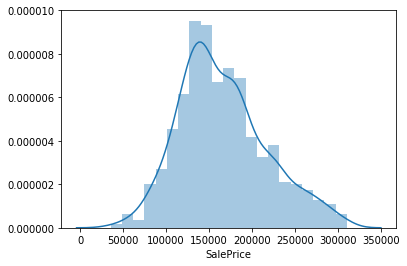

In [47]:
sns.distplot(house['SalePrice'])

<font color='blue' size=4>The 'SalePrice' depicts a normal distribution.</font>

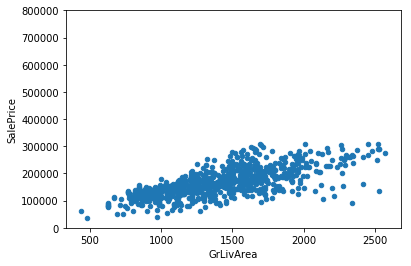

In [48]:
var = 'GrLivArea'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<font color='blue' size=4>There is slight dependence</font>

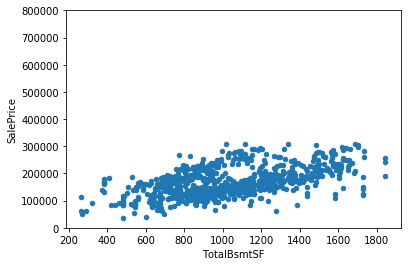

In [49]:
var = 'TotalBsmtSF'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<font color='blue' size=4>There is slight dependence</font>

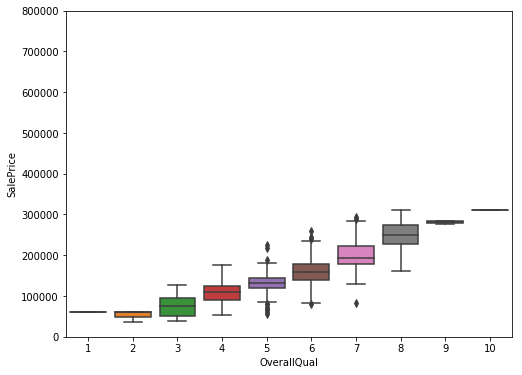

In [50]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

<font color='blue' size=4>The 'SalePrice' depends directly on the 'OverallQual'</font>

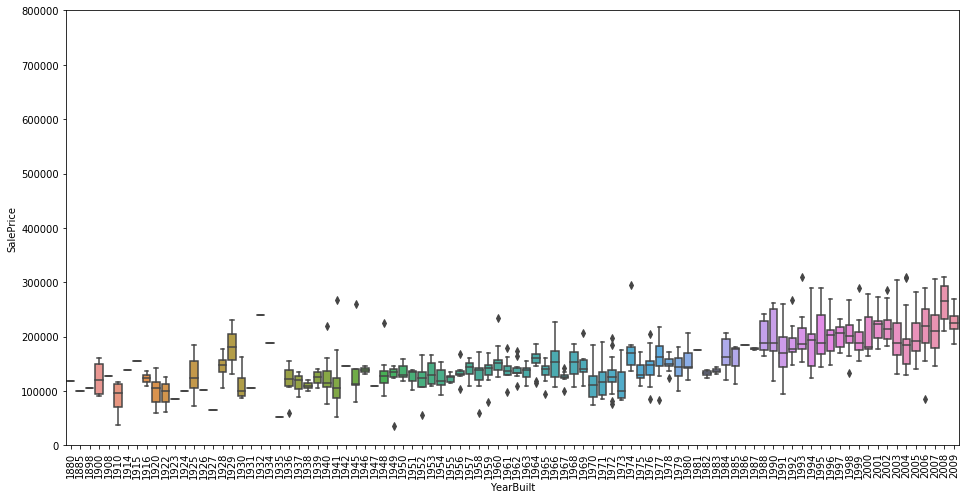

In [51]:
var = 'YearBuilt'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

<font color='blue' size=4>Slight increase in the price can be seen over the years. But with a lot of inconsistency in increase of 'SalePrice'</font> 

## <font color='brown'>Model Formation</font>

In [52]:
# Forming X and y datasets
y = house.pop('SalePrice')
X = house

In [53]:
# Scalling the Dataset
scaler = StandardScaler()
scaler.fit(X)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## <font color='brown'>LASSO</font>

In [55]:
# list of alphas to tune
params = {'alpha': [ 0.01, 0.05, 0.1, 10, 20, 45, 48, 50, 100, 200]}

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.05, 0.1, 10, 20, 45, 48, 50, 100,
                                   200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.138508,0.095582,0.001396,0.000489,0.01,{'alpha': 0.01},-12559.423681,-14284.660952,-14218.200928,-16822.989706,...,-14843.768300,1552.995889,10,-7714.374063,-7292.586545,-7419.310660,-7004.011355,-7183.758433,-7322.808211,238.543985
1,0.079986,0.008951,0.001596,0.000798,0.05,{'alpha': 0.05},-12477.542382,-14298.409829,-14199.753363,-16595.694010,...,-14742.338976,1483.912572,8,-7715.190092,-7294.177753,-7420.607439,-7005.107065,-7184.482414,-7323.912952,238.499423
2,0.073403,0.004531,0.001197,0.000399,0.1,{'alpha': 0.1},-12472.713530,-14460.663522,-14185.323112,-16574.017734,...,-14760.825838,1467.549295,9,-7716.456072,-7296.152810,-7422.240326,-7006.428823,-7185.633018,-7325.382210,238.510259
3,0.070411,0.014947,0.001396,0.000489,10,{'alpha': 10},-10649.460858,-13078.444957,-13167.095915,-14702.091243,...,-13102.360490,1359.450521,7,-8055.130906,-7753.919069,-7773.837042,-7431.478688,-7618.834464,-7726.640034,204.753617
4,0.051661,0.015801,0.002194,0.000399,20,{'alpha': 20},-10147.501204,-12318.649915,-12686.001061,-13857.191194,...,-12463.512452,1272.027030,6,-8407.597364,-8169.526066,-8136.234251,-7766.238573,-7870.288217,-8069.976894,228.219277


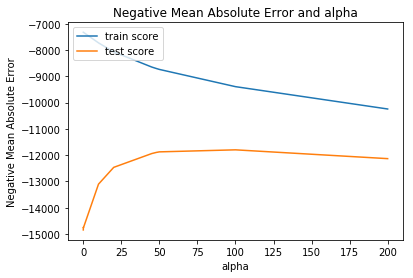

In [59]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [78]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-8.93497990e+01,  7.13004923e-01,  5.91786576e+03,  5.15407834e+03,
        2.76945952e+02,  5.53874676e+01,  9.74952619e+00,  2.40584645e+01,
        1.79832428e+01,  1.20971458e+01,  1.79943388e+01,  2.90429867e+01,
        4.42199494e+01,  1.34459002e+01,  5.06775185e+03, -8.34929387e+02,
        2.55434587e+02, -4.19381298e+03, -1.20824373e+04,  1.91157568e+02,
        3.02221340e+03,  9.18446255e+01,  1.98054439e+03,  1.94294163e+01,
        1.43071824e+01,  2.09120550e+01,  2.91163859e+01,  8.89377410e+00,
        4.77245075e+01, -4.19753351e+02,  5.43889054e+03,  7.41337242e+03,
       -3.54027406e+00,  1.64550117e+02,  3.54939790e+02, -3.92838162e+03,
       -1.51317400e+03,  2.71716543e+03,  1.94687570e+04, -7.45700846e+03,
       -2.52371198e+03, -5.39178311e+03, -3.23362658e+03, -1.87203166e+03,
        1.03025816e+04,  6.13063633e+03,  1.63333350e+04,  2.53400523e+03,
       -2.97674667e+03,  5.21897990e+03, -8.90461693e+03,  7.49752404e+02,
       -2.30391892e+03, -

In [79]:
col = (house.columns[lasso.coef_!=0])
len(col)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 300 but corresponding boolean dimension is 88

In [80]:
X_train = X_train[col]
X_test = X_test[col]

## <font color='brown'>RIDGE</font>

In [63]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.05, 0.1, 10, 20, 45, 48, 50, 100,
                                   200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.055484,0.103990,0.001808,0.000754,0.01,{'alpha': 0.01},-9701.889923,-11479.319491,-12067.796236,-12737.642972,...,-11494.740742,1008.742732,4,-9413.241777,-9241.948942,-9182.639447,-8761.480670,-9157.490561,-9151.360279,214.387640
1,0.003790,0.000398,0.001201,0.000397,0.05,{'alpha': 0.05},-9694.908847,-11438.105071,-12053.717643,-12732.151317,...,-11480.517967,1008.499169,3,-9414.032328,-9244.662501,-9184.309086,-8760.678588,-9155.720369,-9151.880574,215.145241
2,0.003391,0.000489,0.001795,0.000399,0.1,{'alpha': 0.1},-9686.565403,-11393.517391,-12037.212887,-12725.443502,...,-11464.497625,1008.394869,2,-9415.637661,-9247.694567,-9186.032649,-8759.727421,-9154.401570,-9152.698774,216.195093
3,0.003590,0.000489,0.001396,0.000488,10,{'alpha': 10},-9757.798152,-11295.011557,-11354.564939,-12560.521918,...,-11376.145527,929.179797,1,-10136.574169,-9737.779044,-9800.512598,-9336.115229,-9772.477980,-9756.691804,254.449376
4,0.003192,0.000977,0.001197,0.000399,20,{'alpha': 20},-10245.575477,-11602.380521,-11517.270384,-12505.033741,...,-11667.364859,823.242985,5,-10576.533488,-10235.549128,-10235.757197,-9813.199032,-10187.686632,-10209.745096,242.326870


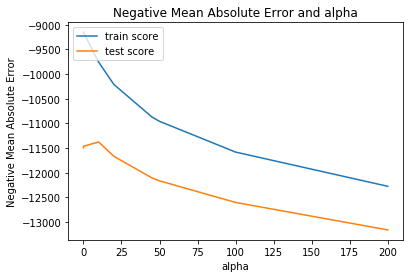

In [65]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [66]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-8.18692523e+01,  6.43735665e-01,  6.36101637e+03,  5.64086237e+03,
        2.96281069e+02,  3.14988046e+01,  1.16159771e+01,  1.45879360e+01,
        1.03778073e+01,  2.27055023e+00,  2.72362933e+01,  8.81212012e+00,
        2.37317165e+01,  3.25438367e+01,  4.95532142e+03, -1.70037740e+03,
        8.73454708e+02, -4.51180290e+03, -7.75517339e+03,  4.15697428e+02,
        4.22590673e+03,  6.17005726e+01,  2.56024700e+03,  1.86042950e+01,
        1.32469228e+01,  1.90144967e+01,  2.99166928e+01,  9.61137080e+00,
        5.23349731e+01, -3.97590282e+02,  5.04235114e+03,  6.88984351e+03,
       -5.26538097e+02,  1.54359315e+03,  2.00600798e+03, -2.99390165e+03,
       -5.56439344e+02,  3.39237542e+03,  1.15587606e+04, -6.54955274e+03,
       -4.69849418e+03, -5.52730853e+03, -3.86371685e+03, -3.62048819e+03,
        7.14462158e+03,  5.61715338e+03,  1.25938782e+04,  4.85575181e+03,
       -5.28582264e+03,  5.73180886e+03, -7.25959172e+03,  3.17224727e+03,
       -3.76665614e+03, -

In [82]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=100)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9361886313985562
0.8913256275186007


<font color='red' size=5>The r2 score for the train dataset is 93.61% and and that of Test dataset is 89.13%</font>

In [68]:
# lasso model parameters
model_parameters = list(ridge.coef_)

model_parameters = pd.Series([round(x, 3) for x in model_parameters])
cols = pd.Series(X.columns)
variab_data = pd.concat([cols, model_parameters], axis=1, keys=['Features', 'Coefficients'])

In [69]:
variab_data.head()

,Features,Coefficients
0,MSSubClass,-81.869
1,LotArea,0.644
2,OverallQual,6361.016
3,OverallCond,5640.862
4,YearBuilt,296.281


<font color='green' size=4>Sorting the Features names in Descending order with respect to the Ridge coefficients.</font>

In [70]:
variab_data = variab_data.sort_values(by='Coefficients', ascending=False)

<font size=5>These are the top 10 Features that affecting the most to the House pricing are:
- 'Neighborhood_Mitchel': This is something unusual, houses having person named 'Mitchel' in the neighboorhood are highly priced.
- 'Alley_None': Having no narrow streets or passage between or behind the house affects the price.
- 'MSZoning_RH': High density Residential areas have high prices. 
- 'LotShape_IR1': Having Nice Lotshape is important.
- 'OverallQual': Overall quality of the houses have direct relation with the house prices.
- 'YearBuilt': With the increase in the Year of their build, house prices also increases.
- 'TotalBsmtSF': Total Basement Surface area increases the price of the House.
</font>